<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

Prediction of House Price Using Linear Regression

# Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [52]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [84]:
# Read CSV
house_csv = "..\\DATA\\Sacramento_transactions.csv"
df=pd.read_csv(house_csv)

In [85]:
# Data Types
# Hint: Look into the columns zip, sale_date & beds
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [30]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [ ]:
# Feature engineering
# to create new columns or information based on current data

In [32]:
df['sale_date'].unique()

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

In [26]:
#
#df.sale_date = pd.to_datetime(df.sale_date,format="%d/%m/%Y %H:M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     985 non-null    object        
 1   city       985 non-null    object        
 2   zip        985 non-null    int64         
 3   state      985 non-null    object        
 4   beds       985 non-null    int64         
 5   baths      985 non-null    int64         
 6   sq__ft     985 non-null    int64         
 7   type       985 non-null    object        
 8   sale_date  985 non-null    datetime64[ns]
 9   price      985 non-null    int64         
 10  latitude   985 non-null    float64       
 11  longitude  985 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 92.5+ KB


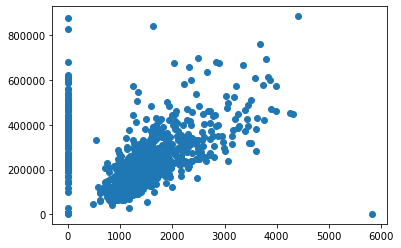

In [53]:
# Perform EDA
plt.scatter(df['sq__ft'],df['price'])

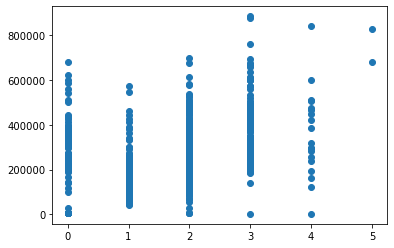

In [54]:
plt.scatter(df['baths'],df['price'])

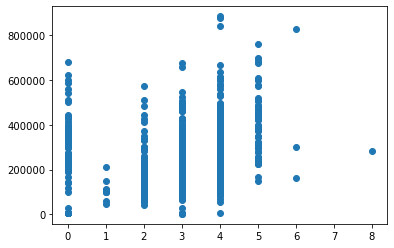

In [55]:
plt.scatter(df['beds'],df['price'])

In [86]:
df['sq__ft'].describe()

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [92]:
#fiverm_all=fiverm.loc[(df.flat_model != 'Premium Apartment') ]
df =df.loc[(df.sq__ft != 0)]

In [93]:
df['sq__ft'].describe()

count     814.000000
mean     1591.146192
std       663.841930
min       484.000000
25%      1144.000000
50%      1418.500000
75%      1851.000000
max      5822.000000
Name: sq__ft, dtype: float64

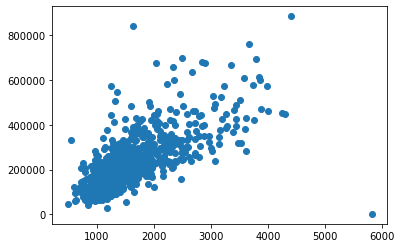

In [96]:
plt.scatter(df['sq__ft'],df['price'])

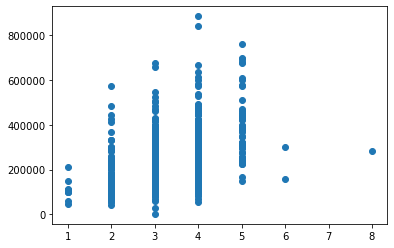

In [97]:
plt.scatter(df['beds'],df['price'])

# Predict Price

We are going to predict `price` from available information.

## What is the Target Variable? Why?

In [38]:
# ANSWER
#Price is the target

## List all possible variables which might be Predictor variable.

In [39]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [ ]:
# ANSWER
# beds/bath, sq__ft,street,city,state,type

## Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [95]:
# ANSWER
test_sqft=np.corrcoef( df['price'],df['sq__ft'])
test_bed=np.corrcoef( df['price'],df['beds'])
test_baths=np.corrcoef(df['price'],df['baths'] )

print(test_sqft)
print(test_bed)
print(test_baths)

[[1.         0.69370795]
 [0.69370795 1.        ]]
[[1.         0.44198774]
 [0.44198774 1.        ]]
[[1.         0.50181973]
 [0.50181973 1.        ]]


In [98]:
test_sqft2=np.corrcoef(df['sq__ft'], df['price'])
test_bed2=np.corrcoef( df['beds'], df['price'])
test_baths2=np.corrcoef(df['baths'] , df['price'])

print(test_sqft2)
print(test_bed2)
print(test_baths2)

[[1.         0.69370795]
 [0.69370795 1.        ]]
[[1.         0.44198774]
 [0.44198774 1.        ]]
[[1.         0.50181973]
 [0.50181973 1.        ]]


## What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [ ]:
# ANSWER
#drawing a linear line across the data

## Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [101]:
X=df[['sq__ft']]
Y=df[['price']]

In [110]:
# ANSWER
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
y_predicted = reg.predict(X)

print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))
print("R^2: "+ str(reg.score(X, Y)))

residuals = Y-y_predicted



m: [[125.21648668]]
b: [30210.63386692]
R^2: 0.4812307133326901


In [111]:
residuals

,price
0,-75669.616731
1,-108126.273822
2,-61002.957264
3,-67588.080518
4,-48108.173751
...,...
980,-83279.223497
981,18844.615307
982,52526.118330
983,-5899.413922


## Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

$$\hat{y} = \beta_0 + \beta_1 x$$

where

> $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

### Define X, Y

- X = Predictor Variable 
- Y = Target Variable

(array([  3.,  47., 120., 138., 147., 130.,  74.,  56.,  30.,  20.,  20.,
          7.,   5.,   6.,   2.,   6.,   0.,   1.,   1.,   1.]),
 array([  2000. ,  46139.5,  90279. , 134418.5, 178558. , 222697.5,
        266837. , 310976.5, 355116. , 399255.5, 443395. , 487534.5,
        531674. , 575813.5, 619953. , 664092.5, 708232. , 752371.5,
        796511. , 840650.5, 884790. ]),
 <BarContainer object of 20 artists>)

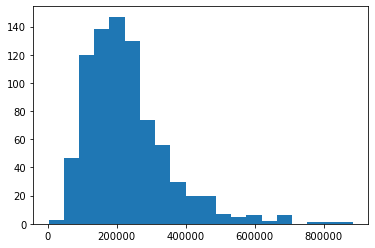

In [231]:
plt.hist(df['price'],bins=20)

In [152]:
# ANSWER
X=df['sq__ft']
Y=df['price']


### Calculate beta_1

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [159]:
# ANSWER
#def calculate_b1(x: pd.Series, y:pd.Series) -> np.float64:
#    xbar=np.mean(x)
#    ybar=np.mean(y)
#    return np.sum((y-ybar)*(x-xbar))/\
#        np.sum(np.square(x-xbar))

xbar=np.mean(X)
ybar=np.mean(Y)
B1=np.sum((Y-ybar)*(X-xbar))/np.sum(np.square(X-xbar))
B1

125.21648667984462

### Calculate beta_0

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [160]:
# ANSWER
B0=ybar-B1*xbar
B0

30210.633866918943

### Find Yhat (Predicted Value Using Beta 0 and Beta 1)

$$\hat{y} = \beta_0 + \beta_1 x$$

In [162]:
# ANSWER
Yhat=B0+B1*X
Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

### Find Residuals

$$ \text{residual}_i = y_i - \hat{y}_i$$

In [163]:
# ANSWER
residual = Y-Yhat
residual

0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Length: 814, dtype: float64

### Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [164]:
# ANSWER
SStot=np.sum(np.square(Y-ybar))
SSres=np.sum(np.square(Y-Yhat))
R2=1-SSres/SStot
R2

0.4812307133326901

### [BONUS] Draw Plot of Predicted Line

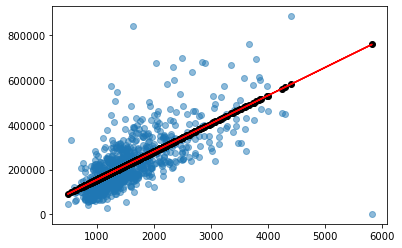

In [218]:
# ANSWER
m, b = B1, B0
y = [X1*m+b for X1 in X1] #X1 due to bottom questions using X as a variable
plt.scatter(X1,Y,alpha=0.5) #original sqft and price
plt.plot(X,y,color='red') #best fit line
plt.scatter(X1,Yhat,color='black') #shows best fit lines like the lineplot
#compare with original sqft and price

In [210]:
X1=X['sq__ft']


### [BONUS] Draw Plot of Predicted Line With Residuals

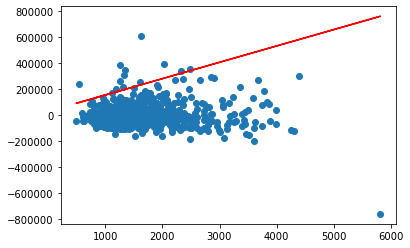

In [174]:
# ANSWER
plt.scatter(X,residual)
plt.plot(X,y,color='red')

### Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [175]:
# ANSWER
PredictPrice=1204*B1+B0
PredictPrice

180971.28382945186

## Find Coefficient and Intercept using Linear SKLearn Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

In [183]:
# ANSWER
X=df[['sq__ft']] #double[] makes it into a column vs single [] doesnt

In [184]:
X.shape

(814, 1)

In [230]:
from sklearn.linear_model import LinearRegression
X=df[['sq__ft']]
y=df['price']

lr = LinearRegression()
lr.fit(X,y)
lr.intercept_,lr.coef_

(30210.633866919, array([125.21648668]))

### Find R Score

In [187]:
# ANSWER
lr.score(X,y)


0.4812307133326901

# Splitting Data

In [189]:
# ANSWER
from sklearn.model_selection import train_test_split

## Create training and testing subsets

Hint: Using `train_test_split` Library

In [220]:
# ANSWER
x_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.5)

## Check Shape, Sample of Test Train Data

In [207]:
# ANSWER
print(str(x_train.shape))
print(str(X_test.shape))
print(str(y_train.shape))
print(str(y_test.shape))
print(str(x_train.sample()))
print(str(X_test.sample()))
print(str(y_train.sample()))
print(str(y_test.sample()))

(407, 1)
(407, 1)
(407,)
(407,)
     sq__ft
431    1939
    sq__ft
63    1479
233    215000
Name: price, dtype: int64
467    258000
Name: price, dtype: int64


## Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [232]:
# ANSWER

lr.fit(x_train,y_train)
lr.intercept_,lr.coef_


(33236.92075117084, array([122.14119407]))

In [223]:

lr.score(X_test,y_test)

0.5009366833514185

## Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

What is the predicted value of that house?

In [228]:
# ANSWER
PredictPrice2=1204*lr.coef_+lr.intercept_
PredictPrice2


array([180294.91841104])

## Find the error

In [226]:
# ANSWER
df.loc[df.sq__ft==1204]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
409,332 PALIN AVE,GALT,95632,CA,3,2,1204,Residential,Mon May 19 00:00:00 EDT 2008,174000,38.260467,-121.302636
930,1140 EDMONTON DR,SACRAMENTO,95833,CA,3,2,1204,Residential,Thu May 15 00:00:00 EDT 2008,174250,38.624570,-121.486913


In [235]:
df.price[930]

174250

In [234]:
error=PredictPrice2-df.price[930]
error

array([6044.91841104])